# Explanatory Visualizations
---

## Overview
In this lesson, we will learn about explanatory analysis which is about conveying and communicating the findings. You will learn:

- Steps to tell a story using data
- Tools and techniques to polish plots
- Presenting findings using a slide deck
- Getting and using feedback

The previous three lessons in the course have been focused on expl**o**ratory analyses. In phases with exploratory visualizations, the primary audience for the visuals will be you, the analyst. The plots that have been created and demonstrated haven't been particularly polished, just descriptive enough for you to gain insights into the data.

This lesson is focused on taking those insights and creating expl**an**atory analyses. Here, your audience will be broader: your goal will be to convey your findings to other people who don't have the level of hands-on experience with the data as you. Visualizations under this banner should be focused on telling a specific story that you want to convey to that particular audience. Many times, these visualizations evolve from visuals created during the exploratory process, just polished up to highlight the specific intended insights. These highlights might change depending on the audience you're presenting to. You'll revisit those design concepts from earlier in the course to make your plots informative not just for yourself, but also compelling and understandable for others.

## Tell a Story
Telling stories with data follows these steps:

- Start with a Question
- Repetition is a Good Thing
- Highlight the Answer
- Call Your Audience To Action

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('support-files/06_Explanatory-Vis/data-storytelling-practice.csv', sep=';')
df.head()

,Feeling,Percent,Feeling.1,Percent.1
0,Bored,11,Bored,12
1,Not Great,5,Not Great,6
2,OK,40,OK,14
3,Kind of Interested,25,Kind of Interested,30
4,Excited,19,Excited,38


In [3]:
df2 = df.copy()
df2 = df.rename(columns={'Percent': 'Before', 'Percent.1': 'After'})
df2.head(10)

,Feeling,Before,Feeling.1,After
0,Bored,11,Bored,12
1,Not Great,5,Not Great,6
2,OK,40,OK,14
3,Kind of Interested,25,Kind of Interested,30
4,Excited,19,Excited,38


In [4]:
df2 = pd.melt(df2, id_vars=['Feeling'], value_vars=['Before', 'After'], value_name='Percent', var_name='id')
df2.head(10)

,Feeling,id,Percent
0,Bored,Before,11
1,Not Great,Before,5
2,OK,Before,40
3,Kind of Interested,Before,25
4,Excited,Before,19
5,Bored,After,12
6,Not Great,After,6
7,OK,After,14
8,Kind of Interested,After,30
9,Excited,After,38


In [5]:
feeling_classes = ['Bored', 'Not Great', 'OK', 'Kind of Interested', 'Excited']
feeling_classes = pd.api.types.CategoricalDtype(ordered=True, categories=feeling_classes)
df2['Feeling'] = df2['Feeling'].astype(feeling_classes)

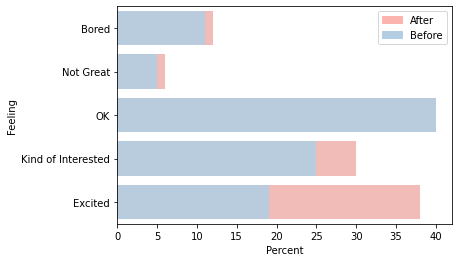

In [6]:
bar1 = sns.barplot(data=df, y='Feeling.1', x='Percent.1', color=sns.color_palette('Pastel1')[0])
bar2 = sns.barplot(data=df, y='Feeling', x='Percent', color=sns.color_palette('Pastel1')[1])

top_bar = mpatches.Patch(color=sns.color_palette('Pastel1')[0], label='After')
bottom_bar = mpatches.Patch(color=sns.color_palette('Pastel1')[1], label='Before')
plt.legend(handles=[top_bar, bottom_bar]);

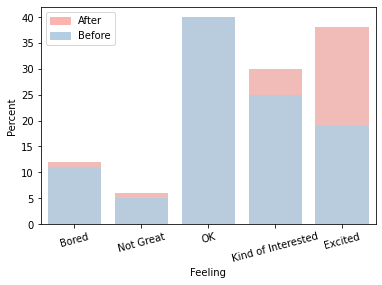

In [7]:
bar1 = sns.barplot(data=df, x='Feeling.1', y='Percent.1', color=sns.color_palette('Pastel1')[0])
bar2 = sns.barplot(data=df, x='Feeling', y='Percent', color=sns.color_palette('Pastel1')[1])

top_bar = mpatches.Patch(color=sns.color_palette('Pastel1')[0], label='After')
bottom_bar = mpatches.Patch(color=sns.color_palette('Pastel1')[1], label='Before')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=15);

In [8]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

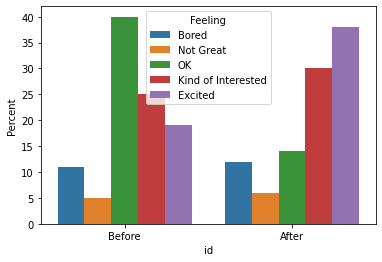

In [9]:
bar3 = sns.barplot(data=df2, x='id', y='Percent', hue='Feeling')

> Note: [Discussion](https://stackoverflow.com/questions/34917727/stacked-bar-plot-by-grouped-data-with-pandas) on StackOverflow that helped me create the chart like the one below.

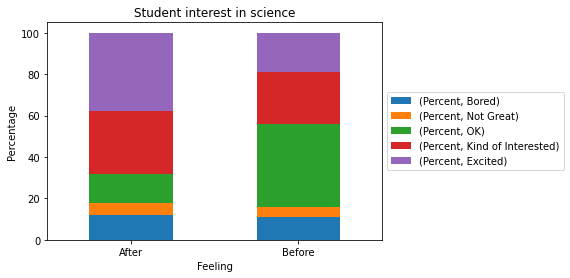

In [11]:
df2.groupby(['id', 'Feeling']).sum().unstack().plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.legend(loc=6, bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Feeling')
plt.ylabel('Percentage')
plt.title('Student interest in science');